In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')

In [247]:
def clean_data (dataset) :
    
    #Remove the rows having '?'
    dataset = dataset[~(dataset[columns] == '?').any(axis=1)]
    
    #Remove rows having 'NaN'
    dataset = dataset.dropna()
    
    #Reset index
    dataset = dataset.reset_index(drop=True)
    
    # Replace '>50K.' with '>50K' and '<=50K.' with '<=50K' 
    dataset = dataset.replace('>50K.', '>50K')
    dataset = dataset.replace('<=50K.', '<=50K')
    
    return dataset
    

In [248]:
def concatDataframe (dataset1, dataset2):
    return pd.concat([dataset1, dataset2], ignore_index=True)

In [249]:
def workClass_vs_Income(labels, less_than_fifty, greater_than_fifty):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, less_than_fifty, width, label='<=50K')
    rects2 = ax.bar(x + width/2, greater_than_fifty, width, label='>50K')

    ax.set_ylabel('% of Adults')
    ax.set_xlabel('Work Class')
    ax.set_title('Income vs Work Class')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [250]:
train_data = clean_data(train_data)

In [251]:
test_data = clean_data(test_data)

In [252]:
concatenate_dataset = concatDataframe(train_data, test_data)

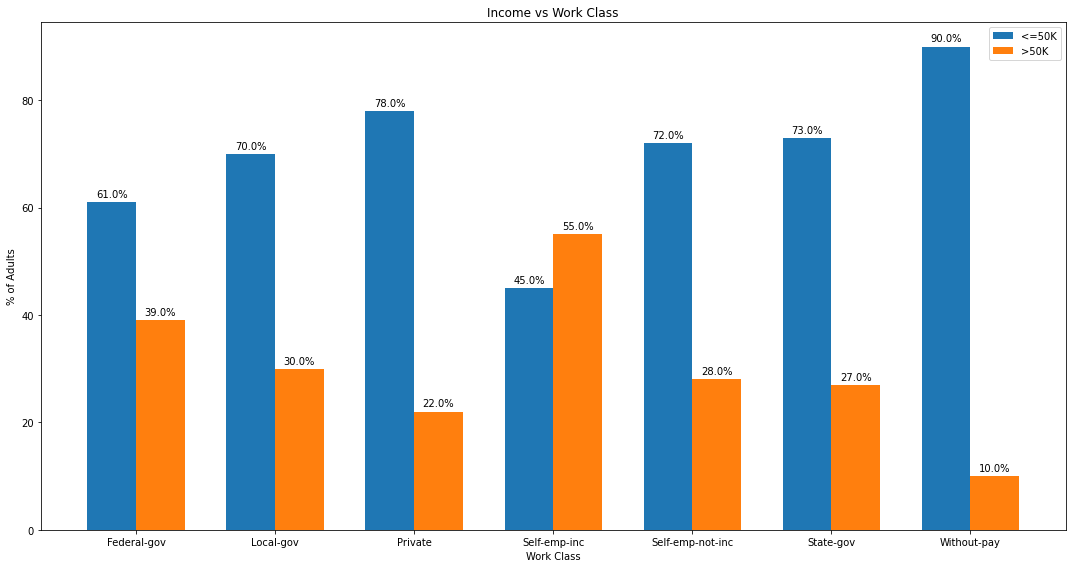

In [253]:
workclass_income = concatenate_dataset.groupby(['WorkClass','Income']).size().unstack(level=0).T
#Normalize data
workclass_income['Total'] = workclass_income['<=50K'] + workclass_income['>50K']
workclass_income['<=50K%'] = round((workclass_income['<=50K'] / workclass_income['Total']) * 100)
workclass_income['>50K%'] = round((workclass_income['>50K'] / workclass_income['Total']) * 100)
workclass_income['WorkClass'] = workclass_income.T.columns

#Put data in a new data frame
dict = {'WorkClass':workclass_income.T.columns.tolist(),
        '<=50K': workclass_income['<=50K%'].tolist(),
        '>50K':workclass_income['>50K%'].tolist()}
workclass_income_dict = pd.DataFrame(dict)

#Plot the comparision between WorkClass and Income
workClass_vs_Income(workclass_income_dict['WorkClass'].tolist(),workclass_income_dict['<=50K'].tolist(), workclass_income_dict['>50K'].tolist() )
